In [2]:
# !pdm add opencv-python

In [3]:
# !pdm add matplotlib

In [4]:
import cv2
import matplotlib.pyplot as plt

In [5]:
# read template PCB 01 image
template_image_path = './dataset/Template-PCB-images/01.jpg'
rgb_template_img = cv2.imread(template_image_path)

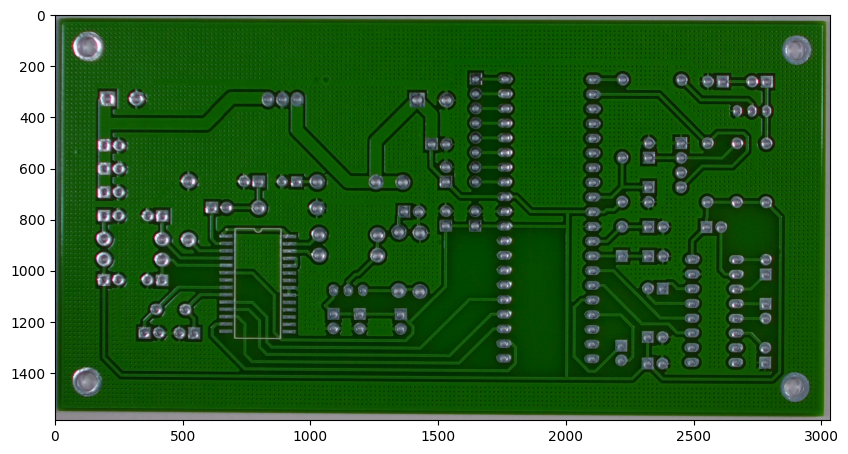

In [6]:
plt.figure(figsize=(10, 6))
plt.imshow(rgb_template_img, cmap="gray")

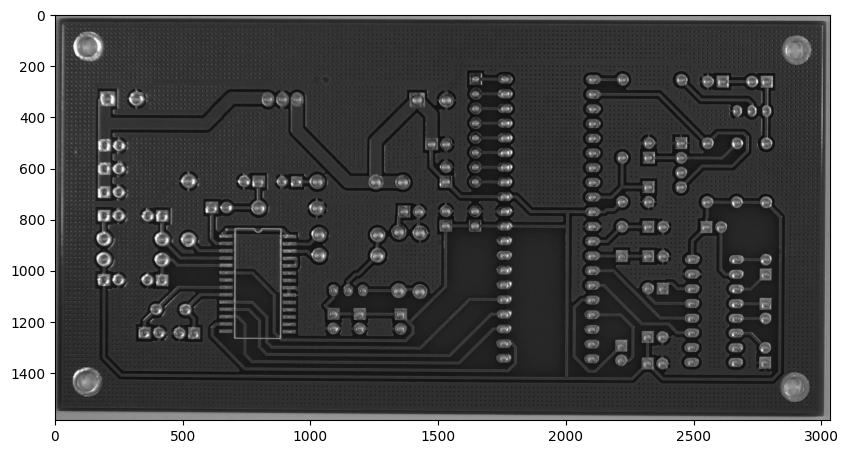

In [7]:
gray_template_img = cv2.imread(template_image_path, 0)

plt.figure(figsize=(10, 6))
plt.imshow(gray_template_img, cmap="gray")

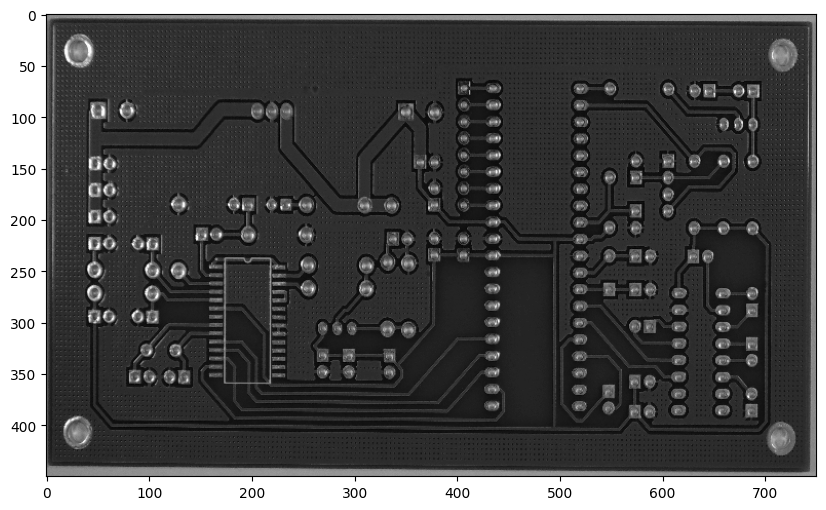

In [8]:
resized_template_img = cv2.resize(gray_template_img, (750, 450))

plt.figure(figsize=(10, 6))
plt.imshow(resized_template_img, cmap="gray")

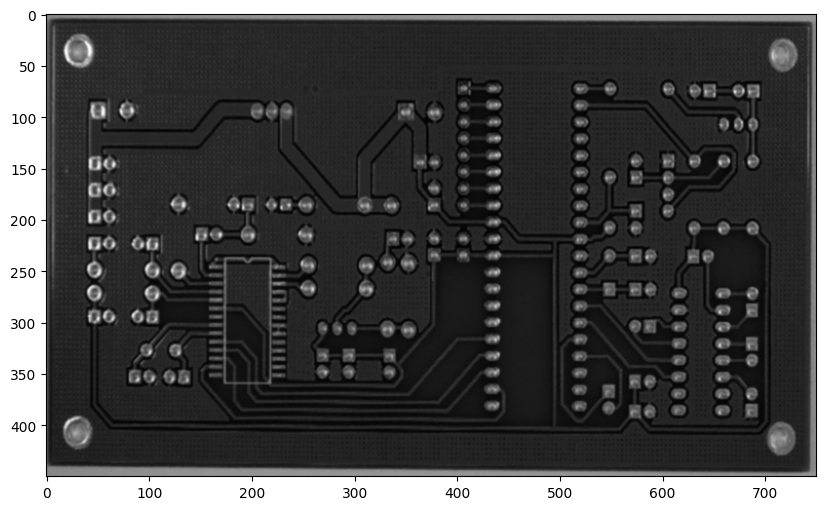

In [9]:
blur_template_img = cv2.GaussianBlur(resized_template_img, (3, 3), 0)

plt.figure(figsize=(10, 6))
plt.imshow(blur_template_img, cmap="gray")

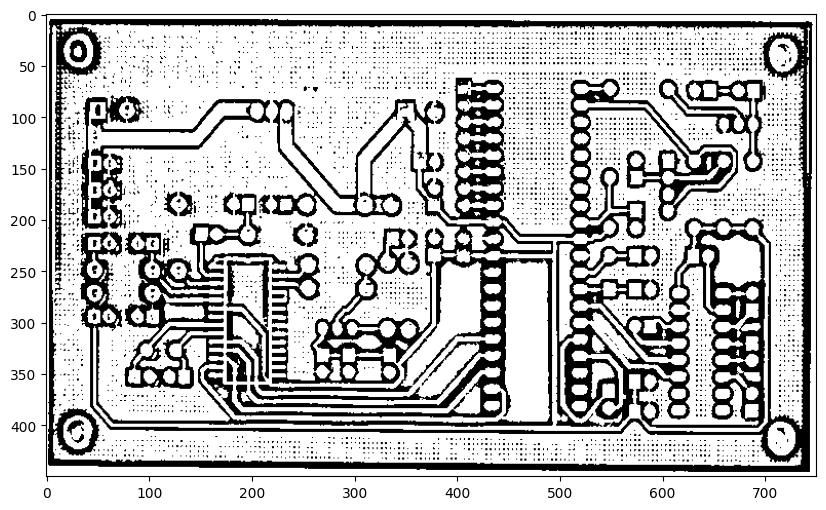

In [10]:
template_adap_thresh = cv2.adaptiveThreshold(blur_template_img, 255,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 15, 5)

plt.figure(figsize=(10, 6))
plt.imshow(template_adap_thresh, cmap="gray")

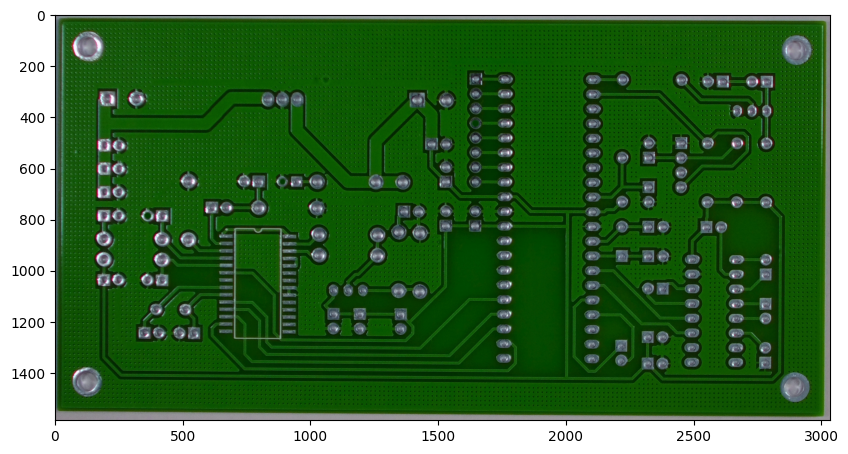

In [11]:
test_img_path = './dataset/Defective-PCB-images/Missing_hole/Missing_hole_01/01_missing_hole_10.jpg'
rgb_test_img = cv2.imread(test_img_path)

plt.figure(figsize=(10, 6))
plt.imshow(rgb_test_img, cmap="gray")

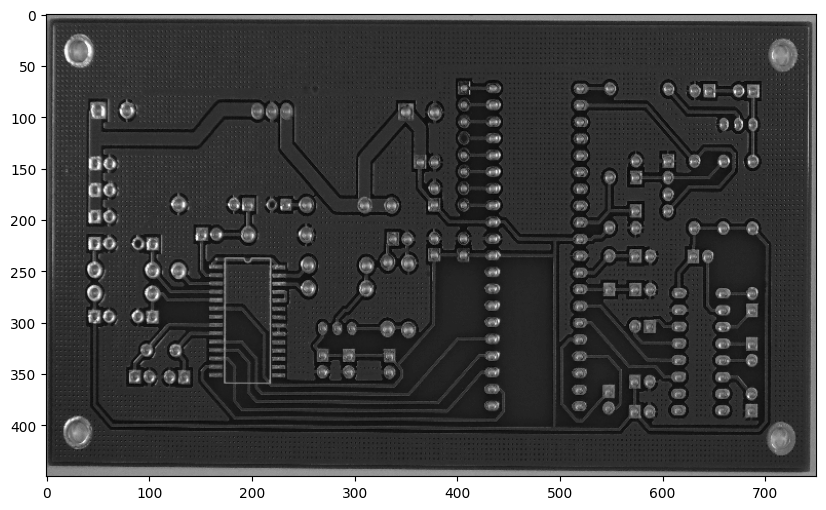

In [12]:
test_img_gray = cv2.imread(test_img_path, 0)

test_img_resize = cv2.resize(test_img_gray, (750, 450))

plt.figure(figsize=(10, 6))
plt.imshow(test_img_resize, cmap="gray")

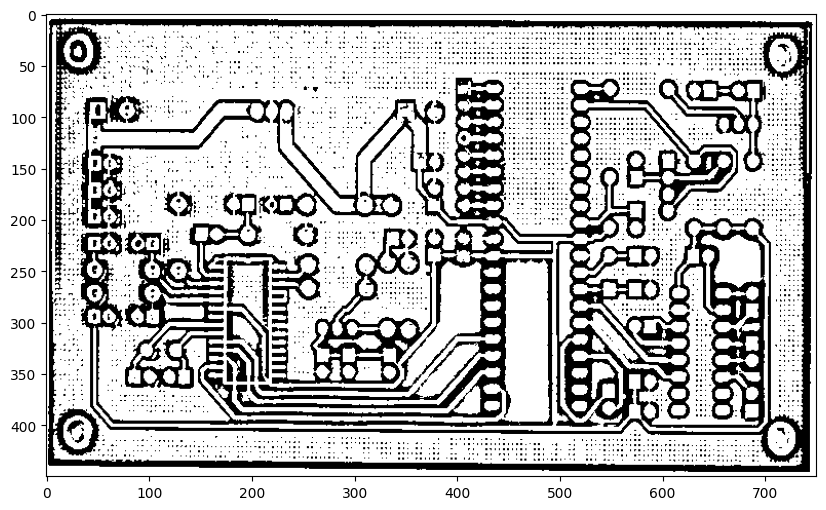

In [13]:
blur_test_img = cv2.GaussianBlur(test_img_resize, (3, 3), 0)

test_adap_thresh = cv2.adaptiveThreshold(blur_test_img, 255,
                                         cv2.ADAPTIVE_THRESH_MEAN_C,
                                         cv2.THRESH_BINARY, 15, 5)

plt.figure(figsize=(10, 6))
plt.imshow(test_adap_thresh, cmap="gray")

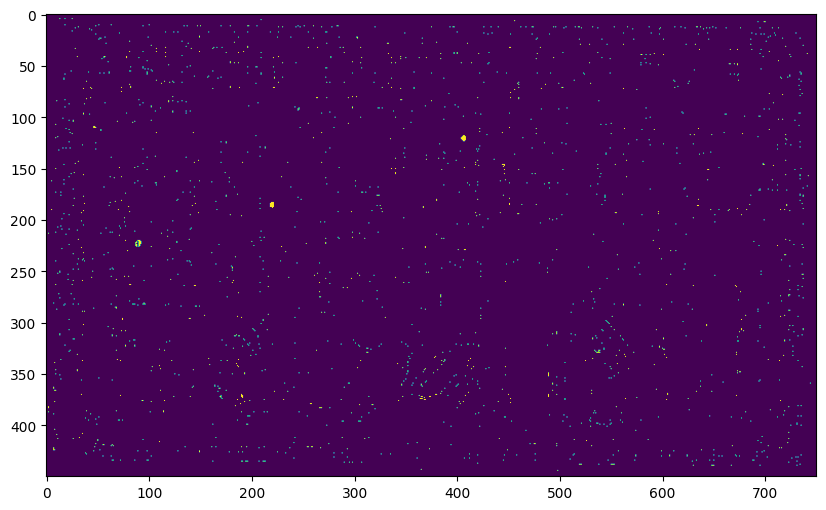

In [14]:
# Image subtraction (template - test)
sub_img = cv2.subtract(template_adap_thresh, test_adap_thresh)

plt.figure(figsize=(10, 6))
plt.imshow(sub_img)

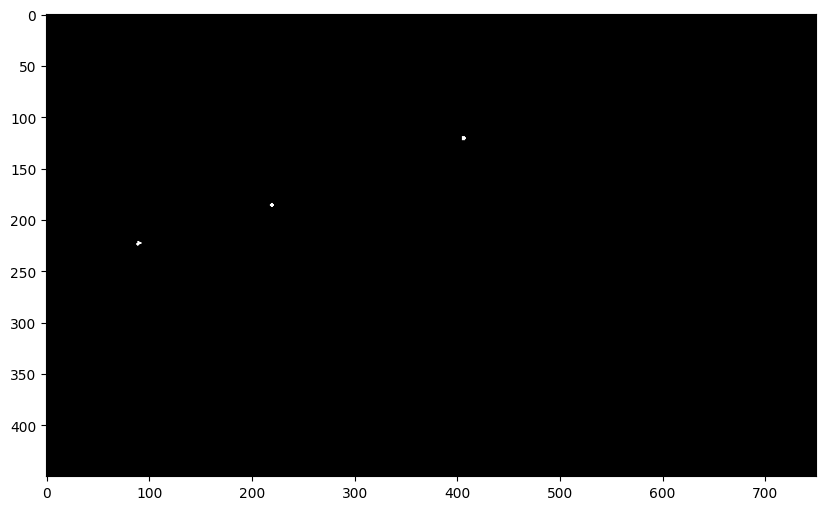

In [15]:
# 中值滤波去除椒盐噪声
final_img = cv2.medianBlur(sub_img, 5)

plt.figure(figsize=(10, 6))
plt.imshow(final_img, cmap="gray")

In [31]:
cnts = cv2.findContours(final_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]
blobs = []
for cnt in cnts:
    if 0 < cv2.contourArea(cnt) < 300:
        blobs.append(cnt)

print("Number of defects in image:")
print(len(blobs))

Number of defects in image:
3


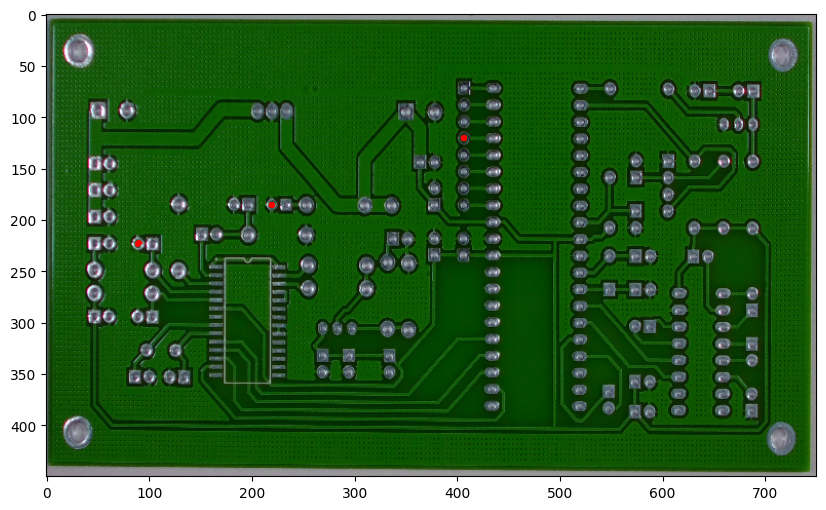

In [32]:
# 绘制轮廓
rgb_test_img_resize = cv2.resize(rgb_test_img, (750, 450))
draw_img = rgb_test_img_resize.copy()
res = cv2.drawContours(draw_img, blobs, -1, (255, 0, 0), 2)
plt.figure(figsize=(10, 6))
plt.imshow(res)